In [1]:
import pandas as pd
import seaborn as sns

import pandas as pd
from tqdm import tqdm

tqdm.pandas()

import seaborn as sns
import matplotlib.pyplot as plt

#### Для дополнения базы данных по витаминам и минералам, выбраны три датасета с содержанием витаминов и минералов в пищевых продуктах.

Датасеты содержат одинаковые признаки, но отличаются данными

https://www.kaggle.com/datasets/mexwell/food-vitamins-minerals-macronutrient

https://www.kaggle.com/datasets/shrutisaxena/food-nutrition-dataset - состоит из двух файлов

https://corgis-edu.github.io/corgis/csv/ingredients/

### Загрузка данных

In [2]:
df1 = pd.read_csv('./data/food_vm.csv') # датасет food-vitamins-minerals-macronutrient
df2 = pd.read_csv('./data/food.csv') # 1 файл датасета food-nutrition-dataset 
df3 = pd.read_csv('./data/food1.csv') # 2 файл датасета food-nutrition-dataset
df4 = pd.read_csv('./data/ingredients.csv') # датасет ingredients

In [3]:
df = pd.read_excel('./data/new_vitamins.xlsx', sheet_name="Ингредиенты")

In [4]:
df1.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

In [6]:
df2.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [8]:
df3.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [10]:
df4.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Butter,"Butter, salted",1001,0,158,0,0.06,215,18.8,0.0,...,24,24,643,0.09,684,0.17,0.003,0.0,2.32,7.0
1,Butter,"Butter, whipped, with salt",1002,1,135,6,0.00,225,18.8,0.0,...,24,41,583,0.05,683,0.07,0.008,0.0,1.37,4.6
2,Butter oil,"Butter oil, anhydrous",1003,0,193,0,0.00,256,22.3,0.0,...,3,5,2,0.01,840,0.01,0.001,0.0,2.80,8.6
3,Cheese,"Cheese, blue",1004,0,74,0,2.34,75,15.4,0.0,...,387,256,1146,2.66,198,1.22,0.166,0.0,0.25,2.4
4,Cheese,"Cheese, brick",1005,0,76,0,2.79,94,15.4,0.0,...,451,136,560,2.60,292,1.26,0.065,0.0,0.26,2.5


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        2332 non-null   object 
 1   Description                     2332 non-null   object 
 2   Nutrient Data Bank Number       2332 non-null   int64  
 3   Data.Alpha Carotene             2332 non-null   int64  
 4   Data.Beta Carotene              2332 non-null   int64  
 5   Data.Beta Cryptoxanthin         2332 non-null   int64  
 6   Data.Carbohydrate               2332 non-null   float64
 7   Data.Cholesterol                2332 non-null   int64  
 8   Data.Choline                    2332 non-null   float64
 9   Data.Fiber                      2332 non-null   float64
 10  Data.Lutein and Zeaxanthin      2332 non-null   int64  
 11  Data.Lycopene                   2332 non-null   int64  
 12  Data.Niacin                     23

Два файла датасета food-nutrition-dataset  выглядят одинаково, проверим это

In [12]:
df2.equals(df3)

True

Данные не отличаются. Один файл отбросим.

Датасеты food-vitamins-minerals-macronutrient и ingredients также выглядят похожими. Проверим.

In [13]:
df1.columns==df4.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [14]:
df1.equals(df4)

False

Данные можно объединить, при наличии дублей, удалим их

In [15]:
df1_4 = pd.concat([df1, df4], ignore_index=True)

In [16]:
df1_4.duplicated().sum()

0

In [17]:
df1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        9415 non-null   object 
 1   Description                     9415 non-null   object 
 2   Nutrient Data Bank Number       9415 non-null   int64  
 3   Data.Alpha Carotene             9415 non-null   int64  
 4   Data.Beta Carotene              9415 non-null   int64  
 5   Data.Beta Cryptoxanthin         9415 non-null   int64  
 6   Data.Carbohydrate               9415 non-null   float64
 7   Data.Cholesterol                9415 non-null   int64  
 8   Data.Choline                    9415 non-null   float64
 9   Data.Fiber                      9415 non-null   float64
 10  Data.Lutein and Zeaxanthin      9415 non-null   int64  
 11  Data.Lycopene                   9415 non-null   int64  
 12  Data.Niacin                     94

По названиям колонок данные датасетов food-vitamins-minerals-macronutrient и food-nutrition-dataset выглядят одинаково, но отличаются числом колонок.

Для того, чтобы объединить датасеты в один, посмотрим, какие колонки не входят в первый датасет, сравним их с основной базой и примем решение, можно ли их объединить по названиям колонок, но часть данных будут nan или различающиеся колонки можно удалить.

In [18]:
s1 = set(df1_4.columns.to_list())
s2 = set(df2.columns.to_list())

In [19]:
s2.difference(s1)

{'Data.Ash',
 'Data.Household Weights.1st Household Weight',
 'Data.Household Weights.1st Household Weight Description',
 'Data.Household Weights.2nd Household Weight',
 'Data.Household Weights.2nd Household Weight Description',
 'Data.Kilocalories',
 'Data.Manganese',
 'Data.Pantothenic Acid',
 'Data.Refuse Percentage',
 'Data.Vitamins.Vitamin A - IU'}

In [20]:
len(s2.difference(s1))

10

Отличающиеся столбцы второго датасета содержат колонки, связанные с каллориями, весом, процентом отходов. Они не важны для нашего исследования.

Однако есть такие параметры как 'Data.Manganese', 'Data.Pantothenic Acid', 'Data.Vitamins.Vitamin A - IU' - эти компоненты есть в базе. При объединении датасетов мы их оставим, при этом т.к. для датасета food-vitamins-minerals-macronutrient этих данных нет, 9415 строк будут содержать nan в этих ингредиентах. Тем не менее мы можем пока оставить эти пропуски, т.к. для вывода данных пользователям мы сможем искать топ-10 продуктов в строках с заполненными значениями.

In [21]:
featres_to_drop = [
    'Data.Ash',
    'Data.Household Weights.1st Household Weight',
    'Data.Household Weights.1st Household Weight Description',
    'Data.Household Weights.2nd Household Weight',
    'Data.Household Weights.2nd Household Weight Description',
    'Data.Kilocalories',
    'Data.Refuse Percentage',
]

In [22]:
df2.drop(featres_to_drop, axis = 1, inplace=True)

Объединим датасеты

In [23]:
df = pd.concat([df1_4, df2], ignore_index=True)
df

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid,Data.Vitamins.Vitamin A - IU
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,0.17,61,0.05,0.011,5.0,0.08,0.3,NaN,NaN,NaN
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,0.42,59,0.56,0.060,0.1,0.03,0.2,NaN,NaN,NaN
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,0.41,32,0.54,0.061,0.0,0.05,0.3,NaN,NaN,NaN
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,0.38,29,0.36,0.034,0.9,0.08,0.3,NaN,NaN,NaN
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,0.41,32,0.54,0.061,0.0,0.05,0.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16823,FROG LEGS,"FROG LEGS,RAW",80200,0,0,0,0.00,50,65.0,0.0,...,1.00,15,0.40,0.120,0.0,1.00,0.1,0.0,0.0,50.0
16824,MACKEREL,"MACKEREL,SALTED",83110,0,0,0,0.00,95,95.0,0.0,...,1.10,47,12.00,0.410,0.0,2.38,7.8,0.0,0.0,157.0
16825,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",90240,0,0,0,0.00,53,81.0,0.0,...,3.00,30,1.30,0.100,0.0,1.50,0.2,0.0,0.0,100.0
16826,SNAIL,"SNAIL,RAW",90560,0,0,0,2.00,50,65.0,0.0,...,1.00,30,0.50,0.130,0.0,5.00,0.1,0.0,0.0,100.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16828 entries, 0 to 16827
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        16828 non-null  object 
 1   Description                     16828 non-null  object 
 2   Nutrient Data Bank Number       16828 non-null  int64  
 3   Data.Alpha Carotene             16828 non-null  int64  
 4   Data.Beta Carotene              16828 non-null  int64  
 5   Data.Beta Cryptoxanthin         16828 non-null  int64  
 6   Data.Carbohydrate               16828 non-null  float64
 7   Data.Cholesterol                16828 non-null  int64  
 8   Data.Choline                    16828 non-null  float64
 9   Data.Fiber                      16828 non-null  float64
 10  Data.Lutein and Zeaxanthin      16828 non-null  int64  
 11  Data.Lycopene                   16828 non-null  int64  
 12  Data.Niacin                     

Также в объединенном датасете есть данные, которых нет в нашей БД. Их мы также можем удалить.

Столбцы, которых нет в основных данных по ингредиентам:

- 'Data.Alpha Carotene' - Альфа-каротин - нет ID
- 'Data.Beta Cryptoxanthin' - Бета-криптоксантин - нет ID
- 'Data.Carbohydrate' - Углеводы - нет ID
- 'Data.Cholesterol' - Холестерин - нет ID
- 'Data.Fat.Saturated Fat' - Жир. Насыщенные жиры - нет ID
- 'Data.Fat.Total Lipid' - Жир. Общий липид - нет ID
- 'Data.Major Minerals.Sodium' - Основные минералы. Натрий - нет ID
- 'Data.Sugar Total' - Общее содержание сахара - не веществ

In [25]:
featres_to_drop2 = [
    'Data.Alpha Carotene',
    'Data.Beta Cryptoxanthin',
    'Data.Carbohydrate',
    'Data.Cholesterol',
    'Data.Fat.Saturated Fat',
    'Data.Fat.Total Lipid',
    'Data.Major Minerals.Sodium',
    'Data.Sugar Total',
    'Data.Water',
    'Data.Vitamins.Vitamin A - IU',
    'Data.Vitamins.Vitamin A - RAE'
]

In [26]:
df.drop(featres_to_drop2, axis = 1, inplace=True)

Проверим дубликаты

In [27]:
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16828 entries, 0 to 16827
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        16828 non-null  object 
 1   Description                     16828 non-null  object 
 2   Nutrient Data Bank Number       16828 non-null  int64  
 3   Data.Beta Carotene              16828 non-null  int64  
 4   Data.Choline                    16828 non-null  float64
 5   Data.Fiber                      16828 non-null  float64
 6   Data.Lutein and Zeaxanthin      16828 non-null  int64  
 7   Data.Lycopene                   16828 non-null  int64  
 8   Data.Niacin                     16828 non-null  float64
 9   Data.Protein                    16828 non-null  float64
 10  Data.Retinol                    16828 non-null  int64  
 11  Data.Riboflavin                 16828 non-null  float64
 12  Data.Selenium                   

In [29]:
df.describe()

,Nutrient Data Bank Number,Data.Beta Carotene,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid
count,1.682800e+04,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,...,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,7413.000000,7413.000000
mean,2.056988e+07,211.423104,28.400767,1.933902,172.299025,183.667340,3.067202,9.639752,65.977003,0.224705,...,144.350071,248.056097,1.608786,0.943739,0.241878,7.750297,1.027550,12.523473,0.416820,0.506845
std,2.878973e+07,1091.524709,46.736898,3.713135,1026.051630,1277.651683,4.923902,9.600264,537.477873,0.460230,...,193.188825,354.413687,3.622217,3.611298,0.501509,48.138732,3.915555,67.153654,2.618055,1.451641
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.148775e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.383000,2.090000,0.000000,0.050000,...,37.000000,107.000000,0.260000,0.000000,0.041000,0.000000,0.010000,0.000000,0.002000,0.008000
50%,2.131550e+04,0.000000,13.600000,0.800000,0.000000,0.000000,1.510500,6.540000,0.000000,0.130000,...,107.000000,193.000000,0.710000,0.100000,0.110000,0.400000,0.290000,1.300000,0.032000,0.278000
75%,4.110330e+07,29.000000,35.600000,2.300000,42.000000,0.000000,4.149250,14.782500,23.000000,0.240000,...,204.000000,305.000000,1.820000,0.640000,0.261000,4.600000,0.830000,5.700000,0.265000,0.623000
max,9.999821e+07,42891.000000,1388.000000,79.000000,39550.000000,46260.000000,127.500000,88.320000,30000.000000,17.500000,...,9918.000000,16500.000000,181.610000,98.890000,12.000000,2400.000000,149.400000,1714.500000,133.000000,35.000000


Посмотрим категории и описание, но сначала приведем все цначения к нижнему регистру, т.к. все строки отличаются регистром

In [30]:
df.Category = df.Category.str.lower()
df.Description = df.Description.str.lower()

In [31]:
df[['Category', 'Description']]

,Category,Description
0,milk,"milk, human"
1,milk,"milk, nfs"
2,milk,"milk, whole"
3,milk,"milk, low sodium, whole"
4,milk,"milk, calcium fortified, whole"
...,...,...
16823,frog legs,"frog legs,raw"
16824,mackerel,"mackerel,salted"
16825,scallop,"scallop,(bay&sea),ckd,stmd"
16826,snail,"snail,raw"


In [32]:
df.Category.value_counts()

Category
beef                                               615
pork                                               412
babyfood                                           407
cereals rte                                        291
soup                                               275
                                                  ... 
cereal (kellogg's special k)                         1
cereal (kellogg's special k blueberry)               1
cereal (kellogg's special k chocolatey delight)      1
cereal (kellogg's special k red berries)             1
snail                                                1
Name: count, Length: 3393, dtype: int64

In [33]:
df.Description.value_counts()

Description
yeast extract spread                 3
blood sausage                        3
eggnog                               3
molasses                             3
honey                                3
                                    ..
greens, fresh, cooked, fat added     1
greens, frozen, cooked, fat added    1
greens, canned, cooked, fat added    1
kale, fresh, cooked, no added fat    1
turtle,green,raw                     1
Name: count, Length: 16696, dtype: int64

In [34]:
(df.Description.value_counts().values > 1).sum()

123

Мы видим, что у нас в данных 3393 категорий и 16696 описания продуктов. Т.е. все описания разные, только несколько строк совпадают по описанию. Проверим их, посмотрим, отличаются ли данные в этих строках (предположительно такая ситуация возникла при объединении датасетов.)

In [35]:
df[df.Description.isin(df.Description.value_counts()[:123].index)].sort_values('Description')

,Category,Description,Nutrient Data Bank Number,Data.Beta Carotene,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid
3047,almond paste,almond paste,42200600,0,28.5,4.8,1,0,1.422,9.00,...,258,314,1.48,0.0,0.036,0.1,13.54,0.0,NaN,NaN
13042,no category,almond paste,12071,0,28.0,4.8,1,0,1.422,9.00,...,258,314,1.48,0.0,0.036,0.1,13.54,0.0,0.856,0.113
7989,asparagus,"asparagus, raw",11011,449,16.0,2.1,710,0,0.978,2.20,...,52,202,0.54,0.0,0.091,5.6,1.13,41.6,NaN,NaN
5825,asparagus,"asparagus, raw",75100800,449,16.0,2.1,710,0,0.978,2.20,...,52,202,0.54,0.0,0.091,5.6,1.13,41.6,NaN,NaN
9723,babyfood,"babyfood, vegetables, squash, strained",3104,896,8.0,0.9,3527,0,0.683,0.81,...,21,185,0.19,0.0,0.070,0.3,0.55,4.7,0.083,0.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,yeast extract spread,yeast extract spread,75236500,0,65.1,6.5,0,0,127.500,23.88,...,104,2100,4.19,0.5,0.000,0.0,0.00,0.0,NaN,NaN
16771,no category,yeast extract spread,43406,0,65.0,3.0,0,0,97.000,27.80,...,104,2600,2.10,0.5,1.300,0.0,0.00,0.0,0.000,0.000
9368,yeast extract spread,yeast extract spread,43406,0,65.1,6.5,0,0,127.500,23.88,...,104,2100,4.19,0.5,0.000,0.0,0.00,0.0,NaN,NaN
7352,zwieback,zwieback,3217,4,10.7,2.5,16,0,1.319,10.10,...,55,305,0.54,0.0,0.082,5.3,2.44,0.9,NaN,NaN


Строки дублируются. Можно удалить строки, в которых категория 'no category' и далее убрать дубли с параметром сохранения первой строки

In [36]:
df = df[df.Category != 'no category']

In [37]:
df = df.drop_duplicates(subset='Description')

In [38]:
(df.Description.value_counts().values > 1).sum()

0

In [39]:
df.shape

(16534, 30)

In [40]:
mapping = {
    'Data.Beta Carotene': 'V000000109',
    'Data.Choline': 'V000000438',
    'Data.Fiber': 'V000000300',
    'Data.Lutein and Zeaxanthin': 'V000000232',
    'Data.Lycopene': 'V000000225',
    'Data.Manganese': 'V000000235',
    'Data.Niacin': 'V000000008',
    'Data.Pantothenic Acid': 'V000000009',
    'Data.Protein': 'V000000105',
    'Data.Retinol': 'V000000004',
    'Data.Riboflavin': 'V000000007',
    'Data.Selenium': 'V000000361',
    'Data.Thiamin': 'V000000005',
    'Data.Fat.Monosaturated Fat': 'V000000253',
    'Data.Fat.Polysaturated Fat': 'V000000303',
    'Data.Major Minerals.Calcium': 'V000000193',
    'Data.Major Minerals.Copper': 'V000000238',
    'Data.Major Minerals.Iron': 'V000000174',
    'Data.Major Minerals.Magnesium': 'V000000234',
    'Data.Major Minerals.Phosphorus': 'V000000430',
    'Data.Major Minerals.Potassium': 'V000000192',
    'Data.Major Minerals.Zinc': 'V000000446',
    'Data.Vitamins.Vitamin B12': 'V000000006',
    'Data.Vitamins.Vitamin B6': 'V000000010',
    'Data.Vitamins.Vitamin C': 'V000000013',
    'Data.Vitamins.Vitamin E': 'V000000017',
    'Data.Vitamins.Vitamin K': 'V000000018',
}

### Категории продуктов

In [41]:
df["Category"].nunique()

3392

В данных 3392 категории продуктов. 

Посмотрим самые частотные по количеству входящих в них продуктов

In [42]:
data = df.Category.value_counts()
data.head(10)

Category
beef              615
pork              412
babyfood          405
cereals rte       291
soup              275
chicken           241
lamb              229
infant formula    206
candies           206
bread             200
Name: count, dtype: int64

Самые частотные категории Говядина, Свинина, Детское питание, Крупы, Суп. 

In [43]:
data = data.reset_index()
data = data.head(30)


In [44]:
data

,Category,count
0,beef,615
1,pork,412
2,babyfood,405
3,cereals rte,291
4,soup,275
5,chicken,241
6,lamb,229
7,infant formula,206
8,candies,206
9,bread,200


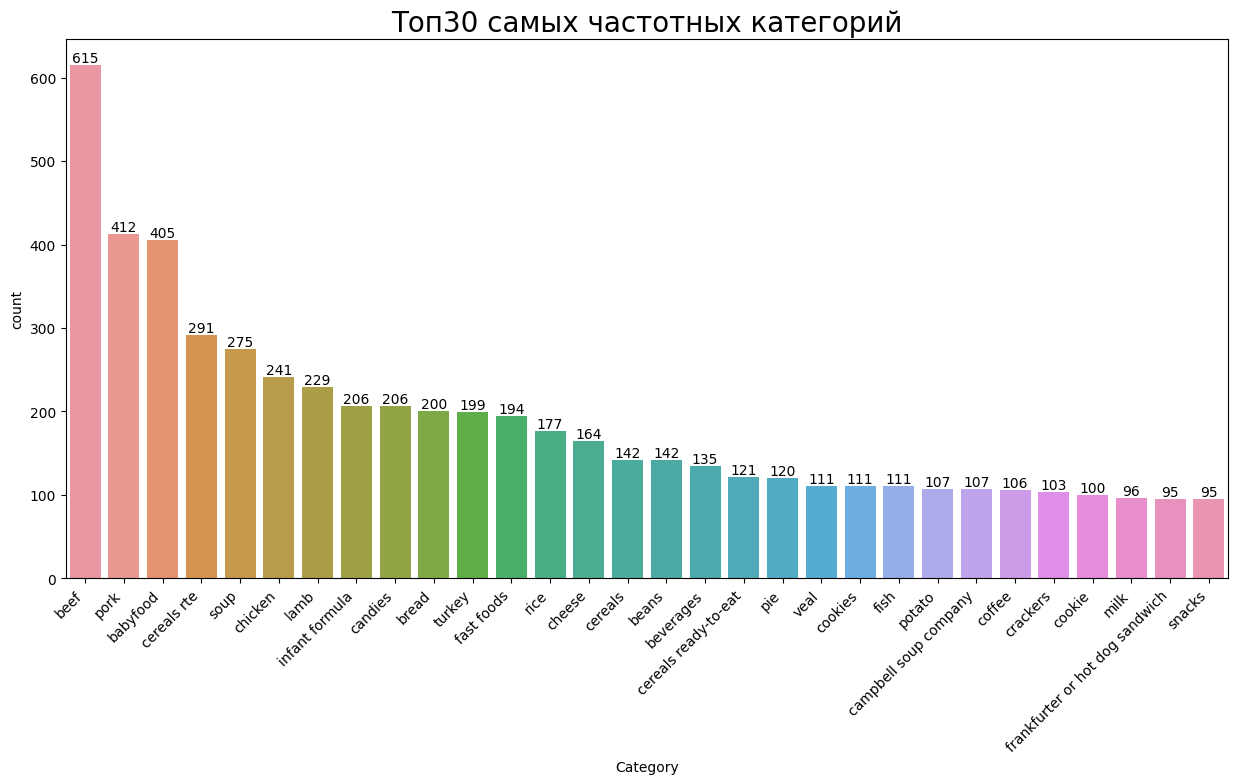

In [45]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data, x="Category", y="count", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Топ30 самых частотных категорий", fontsize=20)
plt.xticks(rotation=45, ha="right");

In [46]:
df[df.Category == "beef"].sample(5)

,Category,Description,Nutrient Data Bank Number,Data.Beta Carotene,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid
9079,beef,"beef, ground, 75% lean meat / 25% fat, crumble...",23580,0,81.5,0.0,0,0,5.345,26.28,...,214,354,6.17,2.80,0.428,0.0,0.12,2.2,NaN,NaN
710,beef,"beef, baby food, ns as to strained or junior",21701000,0,37.6,0.0,0,0,2.495,12.03,...,93,187,2.22,1.26,0.039,2.1,0.37,0.6,NaN,NaN
16318,beef,"beef,chuck,arm pot rst,ln,1/8"" fat,choic,ckd,brsd",23614,0,132.0,0.0,0,0,5.243,34.72,...,213,275,8.20,2.69,0.344,0.0,0.46,1.7,0.012,0.682
13238,beef,"beef,rnd,bttm rnd,ln,0""fat,choic,ckd,brsd",13410,0,126.0,0.0,0,0,6.356,33.08,...,209,271,5.79,1.95,0.462,0.0,0.45,1.6,0.011,0.650
13418,beef,"beef,tenderloin,ln&fat,1/8""fat,choic,raw",13920,0,83.0,0.0,0,0,6.392,19.82,...,177,303,3.50,1.10,0.534,0.0,0.41,1.6,0.012,0.579


In [47]:
df[df.Category == "beef"]["Description"].sample(10)

8230     beef, tenderloin, roast, separable lean and fa...
13362    beef,rib,sml end (ribs 10-12),ln&fat,1/8"fat,p...
16323         beef,rnd,bttm rnd,ln,1/8" fat,choic,ckd,rstd
16351                   beef,rnd,tip rnd,ln,0" fat,sel,raw
1931     beef, potatoes, and vegetables excluding carro...
13287    beef,shrt loin,t-bone steak,ln,0" fat,all grds...
690      beef, pot roast, braised or boiled, lean only ...
681      beef, shortribs, barbecued, with sauce, lean a...
13283    beef,shrt loin,prtrhs steak,ln only,0" fat,usd...
13286    beef,shrt loin,t-bone stk,ln & fat,0" fat,usda...
Name: Description, dtype: object

Очень подробное разбиение продуктов внутри категории. Учитываются части туши, виды и наполнения фарша, жирность мяса и многие другие данные

### Посмотрим минимальное, среднее и максимальное содержание витаминов для каждой категории

In [48]:
vitamins = [
    "Data.Beta Carotene",
    "Data.Choline",
    "Data.Fiber",
    "Data.Lutein and Zeaxanthin",
    "Data.Lycopene",
    "Data.Niacin",
    "Data.Protein",
    "Data.Retinol",
    "Data.Riboflavin",
    "Data.Selenium",
    "Data.Thiamin",
    "Data.Fat.Monosaturated Fat",
    "Data.Fat.Polysaturated Fat",
    "Data.Major Minerals.Calcium",
    "Data.Major Minerals.Copper",
    "Data.Major Minerals.Iron",
    "Data.Major Minerals.Magnesium",
    "Data.Major Minerals.Phosphorus",
    "Data.Major Minerals.Potassium",
    "Data.Major Minerals.Zinc",
    "Data.Vitamins.Vitamin B12",
    "Data.Vitamins.Vitamin B6",
    "Data.Vitamins.Vitamin C",
    "Data.Vitamins.Vitamin E",
    "Data.Vitamins.Vitamin K",
    "Data.Manganese",
    "Data.Pantothenic Acid",
]

In [49]:
def get_dict(aggfoo, v_list=vitamins):
    res_dict = {}
    for i in v_list:
        res_dict[i] = aggfoo
    return res_dict

In [50]:
df.groupby('Category').agg(get_dict('min'))

,Data.Beta Carotene,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid
Category,,,,,,,,,,,,,,,,,,,,,
100 grand bar,3,24.6,1.0,2,0,0.198,2.50,37,0.119,2.5,...,86,163,0.99,0.29,0.016,0.7,0.42,6.2,NaN,NaN
3 musketeers bar,0,12.2,1.5,1,0,0.230,2.60,20,0.056,1.9,...,69,133,0.55,0.16,0.015,0.2,0.98,2.9,NaN,NaN
3 musketeers truffle crisp bar,0,36.6,0.0,5,0,0.306,6.41,46,0.239,3.6,...,165,296,1.83,0.60,0.028,0.0,0.60,5.8,NaN,NaN
abalone,0,0.0,0.0,0,0,1.500,17.10,2,0.096,44.8,...,190,250,0.82,0.69,0.150,1.4,0.00,0.0,0.040,2.87
abiyuch,60,0.0,5.3,0,0,0.000,1.50,0,0.000,0.0,...,47,304,0.31,0.00,0.000,54.1,0.00,0.0,0.182,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zucchini,95,7.9,0.8,1674,0,0.355,1.00,0,0.075,0.2,...,32,217,0.27,0.00,0.122,12.6,0.10,3.6,NaN,NaN
zucchini lasagna,599,9.0,1.6,391,1307,0.802,5.42,29,0.111,9.7,...,116,215,0.83,0.13,0.104,9.3,0.43,4.5,NaN,NaN
zucchini soup,71,8.5,0.4,745,0,0.293,1.70,17,0.099,0.8,...,45,148,0.27,0.14,0.068,6.2,0.08,11.2,NaN,NaN


In [51]:
df.groupby("Category").agg(get_dict("mean"))

,Data.Beta Carotene,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid
Category,,,,,,,,,,,,,,,,,,,,,
100 grand bar,3.0,24.60,1.00,2.0,0.0,0.198,2.50,37.0,0.1190,2.50,...,86.0,163.0,0.990,0.290,0.016,0.70,0.420,6.2,NaN,NaN
3 musketeers bar,0.0,12.20,1.50,1.0,0.0,0.230,2.60,20.0,0.0560,1.90,...,69.0,133.0,0.550,0.160,0.015,0.20,0.980,2.9,NaN,NaN
3 musketeers truffle crisp bar,0.0,36.60,0.00,5.0,0.0,0.306,6.41,46.0,0.2390,3.60,...,165.0,296.0,1.830,0.600,0.028,0.00,0.600,5.8,NaN,NaN
abalone,0.0,71.14,0.12,9.8,0.0,1.992,21.88,5.4,0.1384,57.08,...,225.8,308.8,1.088,0.852,0.178,2.24,4.374,26.5,0.055,2.935
abiyuch,60.0,0.00,5.30,0.0,0.0,0.000,1.50,0.0,0.0000,0.00,...,47.0,304.0,0.310,0.000,0.000,54.10,0.000,0.0,0.182,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zucchini,95.0,7.90,0.80,1674.0,0.0,0.355,1.00,0.0,0.0750,0.20,...,32.0,217.0,0.270,0.000,0.122,12.60,0.100,3.6,NaN,NaN
zucchini lasagna,599.0,9.00,1.60,391.0,1307.0,0.802,5.42,29.0,0.1110,9.70,...,116.0,215.0,0.830,0.130,0.104,9.30,0.430,4.5,NaN,NaN
zucchini soup,71.0,8.50,0.40,745.0,0.0,0.293,1.70,17.0,0.0990,0.80,...,45.0,148.0,0.270,0.140,0.068,6.20,0.080,11.2,NaN,NaN


In [52]:
df.groupby("Category").agg(get_dict("max"))

,Data.Beta Carotene,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Manganese,Data.Pantothenic Acid
Category,,,,,,,,,,,,,,,,,,,,,
100 grand bar,3,24.6,1.0,2,0,0.198,2.50,37,0.119,2.5,...,86,163,0.99,0.29,0.016,0.7,0.42,6.2,NaN,NaN
3 musketeers bar,0,12.2,1.5,1,0,0.230,2.60,20,0.056,1.9,...,69,133,0.55,0.16,0.015,0.2,0.98,2.9,NaN,NaN
3 musketeers truffle crisp bar,0,36.6,0.0,5,0,0.306,6.41,46,0.239,3.6,...,165,296,1.83,0.60,0.028,0.0,0.60,5.8,NaN,NaN
abalone,0,129.4,0.6,49,0,2.688,34.05,17,0.189,89.2,...,284,448,1.63,1.31,0.269,3.2,7.96,45.8,0.070,3.0
abiyuch,60,0.0,5.3,0,0,0.000,1.50,0,0.000,0.0,...,47,304,0.31,0.00,0.000,54.1,0.00,0.0,0.182,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zucchini,95,7.9,0.8,1674,0,0.355,1.00,0,0.075,0.2,...,32,217,0.27,0.00,0.122,12.6,0.10,3.6,NaN,NaN
zucchini lasagna,599,9.0,1.6,391,1307,0.802,5.42,29,0.111,9.7,...,116,215,0.83,0.13,0.104,9.3,0.43,4.5,NaN,NaN
zucchini soup,71,8.5,0.4,745,0,0.293,1.70,17,0.099,0.8,...,45,148,0.27,0.14,0.068,6.2,0.08,11.2,NaN,NaN


В данных 3392 категори и визуально очень сложно сравнивать аггрегированные статистики.

Возьмем Niacin (V000000008) как витамин, который чаще всего встречается в сочетаемости с лекарствами. Посмтрим, насколько для него отличаются статистики по группам.

In [53]:
data = df.groupby("Category").agg({'Data.Niacin': ['min', 'mean', 'max']})
data. sample(20)

Data.Niacin                 
                                                        min      mean    max
Category                                                                    
lean pockets                                          3.462  3.462000  3.462
waffle                                                1.364  4.237333  7.942
yardlong bns                                          0.551  1.086667  2.158
dates                                                 1.274  1.386000  1.610
turkey rst                                            4.400  5.335500  6.271
alfredo sauce with poultry and added vegetables       2.068  2.068000  2.068
pepper steak                                          2.256  2.256000  2.256
pea soup                                              0.536  0.536000  0.536
biryani with chicken                                  2.213  2.213000  2.213
rowal                                                 0.000  0.000000  0.000
persimmon                                             0.100  0.169500  0.239
croissant                                             1.837  2.072250  2.188
creamed christophine                                  0.586  0.586000  0.586
catsup                                                1.426  1.431333  1.434
tomato chili sauce                                    1.600  1.600000  1.600
truffles                                              0.330  0.330000  0.330
cheesecake prep from mix                              0.493  0.493000  0.493
energy drink (vault)                                  0.015  0.015000  0.015
potato skins                                          1.058  1.234667  1.588
black bean sauce                                      1.224  1.224000  1.224

В семплированных данных видно, что статистики совпаадют. Посмотрим, сколько категорий с одинаковыми значениями аггрегированных минамального, среднего и максимального.

In [54]:
data[
    (data[("Data.Niacin", "min")] == data[("Data.Niacin", "mean")])&
    (data[("Data.Niacin", "mean")] == data[("Data.Niacin", "max")])
].shape[0]

2283

Категорий с одинаковыми аггрегированными статистиками для витамина В3 2283 (это 67% категорий)

### ТОП-10 продуктов, содержащих Niacin

In [55]:
niacin_max_10 = data[
    (data[("Data.Niacin", "min")] != data[("Data.Niacin", "mean")])
    & (data[("Data.Niacin", "mean")] != data[("Data.Niacin", "max")])
    & (data[("Data.Niacin", "min")] != data[("Data.Niacin", "max")])
].sort_values(("Data.Niacin", "max"), ascending=False).head(10)

In [56]:
niacin_max_10

Data.Niacin                   
                               min       mean     max
Category                                             
cereals rte                  0.000  16.423292  90.567
orange-flavor drk            0.000  17.804600  80.000
fruit-flavored drk           0.000  40.000000  80.000
beverages                    0.000   4.079341  80.000
cereals ready-to-eat         0.200  15.405826  69.000
tuna                         5.799  15.344926  54.848
malted drk mix               0.259  13.683250  50.937
form bar                     0.000  26.889429  45.249
leavening agents             0.000   8.042308  40.200
nutritional powder mix       1.136  18.124818  38.462

In [57]:
niacin_max_10.index

Index(['cereals rte', 'orange-flavor drk', 'fruit-flavored drk', 'beverages',
       'cereals ready-to-eat', 'tuna', 'malted drk mix', 'form bar',
       'leavening agents', 'nutritional powder mix'],
      dtype='object', name='Category')

Такой запрос будет необходим при поиске топ категорий продуктов, содержащих искомый витамин. 

In [58]:
niacin_min_10 = (
    data[
        (data[("Data.Niacin", "min")] != data[("Data.Niacin", "mean")])
        & (data[("Data.Niacin", "mean")] != data[("Data.Niacin", "max")])
        & (data[("Data.Niacin", "min")] != data[("Data.Niacin", "max")])
    ]
    .sort_values(("Data.Niacin", "min"))
    .head(10)
)

In [59]:
niacin_min_10

Data.Niacin                  
                              min      mean     max
Category                                           
frozen novelties              0.0  0.132192   0.960
campbell soup company         0.0  0.077234   1.190
campbell                      0.0  0.892500   1.190
campbell                      0.0  0.104367   1.544
drink mix                     0.0  0.110000   0.220
salad drsng                   0.0  0.092383   0.700
cake                          0.0  1.303910   3.463
duck                          0.0  4.888053  10.350
salad dressing                0.0  0.121225   0.700
butter replacement            0.0  0.005333   0.016

Запрос минимального содержания дает нули

Смаппим названия колонок с ИД витаминов, чтобы привести данные к виду для хранения в БД

In [60]:
df = df.rename(columns=mapping)

In [61]:
df.sample(5)

,Category,Description,Nutrient Data Bank Number,V000000109,V000000438,V000000300,V000000232,V000000225,V000000008,V000000105,...,V000000430,V000000192,V000000446,V000000006,V000000010,V000000013,V000000017,V000000018,V000000235,V000000009
14896,pie,"pie,lemon meringue,prep from recipe",18321,0,0.0,0.0,0,0,0.944,3.80,...,42,65,0.28,0.12,0.027,3.3,0.00,0.0,0.128,0.214
7269,babyfood,"babyfood, dinner, pasta with vegetables",3077,282,6.4,1.5,341,290,0.560,1.70,...,50,133,0.40,0.00,0.110,2.9,0.23,2.1,NaN,NaN
6945,fruit punch,"fruit punch, alcoholic",93301270,1,1.2,0.1,0,0,0.078,0.14,...,4,50,0.07,0.00,0.038,3.8,0.01,0.1,NaN,NaN
15457,gelatin dssrt,"gelatin dssrt,dry mix,red cal,w/ asprt,no adde...",19704,0,0.0,0.0,0,0,0.040,55.30,...,1293,14,0.07,0.00,0.049,0.0,0.00,0.0,0.049,0.059
14636,bagels,"bagels,cinnamon-raisin,tstd",18006,1,16.0,2.5,56,0,2.981,10.60,...,83,163,0.81,0.00,0.060,0.6,0.34,0.8,0.328,0.047


In [62]:
df.to_csv('food_concatenated.csv', index = False)